## Mooring profile subplots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import xarray as xr
import cmocean
import matplotlib.dates as mdates
import cmocean
import gsw
from matplotlib.lines import Line2D
import matplotlib as mpl
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import itertools
from matplotlib import gridspec

In [2]:
# open Sverdrup 2019 dataset
file_dir = Path('C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
sverdrup_ds = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Sverdrup_1D_L3_2018-2019.nc")
sverdrup_ds.close()

In [3]:
# open Rink 2019 dataset
file_dir = Path('C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
rink_ds = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Rink_1D_L3_2018-2019.nc")
rink_ds.close()

In [4]:
# open Fisher Islands 2020 dataset
file_dir = Path('C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2020')
fisher_ds = xr.open_dataset(file_dir / 'OMG_Narwhals_Mooring_Fisher_1D_L3_2019-2020.nc')
fisher_ds.close()

In [5]:
# open Kong Oscar 2019 dataset
file_dir = Path('C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
kongoscar19 = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_KongOscar_1D_L3_2018-2019.nc")
kongoscar19.close()

In [6]:
# open Kong Oscar 2020 dataset
file_dir = Path('C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2020')
kongoscar20 = xr.open_dataset(file_dir / 'OMG_Narwhals_Mooring_KongOscar_1D_L3_2019-2020.nc')
kongoscar20.close()

In [7]:
# load interpolated temp and salinity datasets
mooring_interp_path = 'C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_interpolated/'

rink_temp_interp_ds = xr.open_dataset(mooring_interp_path + 'OMG_Narwhals_Mooring_Rink_1D_interpolated_temp_profile.nc')
rink_salt_interp_ds = xr.open_dataset(mooring_interp_path + 'OMG_Narwhals_Mooring_Rink_1D_interpolated_salt_profile.nc')
fisher_temp_interp_ds = xr.open_dataset(mooring_interp_path + 'OMG_Narwhals_Mooring_Fisher_1D_interpolated_temp_profile.nc')
fisher_salt_interp_ds = xr.open_dataset(mooring_interp_path + 'OMG_Narwhals_Mooring_Fisher_1D_interpolated_salt_profile.nc')

KO_temp_interp_ds = xr.open_dataset(mooring_interp_path + 'OMG_Narwhals_Mooring_KongOscar_1D_interpolated_temp_profile.nc')
KO_salt_interp_ds = xr.open_dataset(mooring_interp_path + 'OMG_Narwhals_Mooring_KongOscar_1D_interpolated_salt_profile.nc')
KO_dens_interp_ds = xr.open_dataset(mooring_interp_path + 'OMG_Narwhals_Mooring_KongOscar_1D_interpolated_density_profile.nc')

sverdrup_temp_interp_ds = xr.open_dataset(mooring_interp_path + 'OMG_Narwhals_Mooring_Sverdrup_1D_interpolated_temp_profile.nc')
sverdrup_salt_interp_ds = xr.open_dataset(mooring_interp_path + 'OMG_Narwhals_Mooring_Sverdrup_1D_interpolated_salt_profile.nc')
sverdrup_dens_interp_ds = xr.open_dataset(mooring_interp_path + 'OMG_Narwhals_Mooring_Sverdrup_1D_interpolated_density_profile.nc')

# open rink/fisher combined dataset
rink_fisher_temp_interp_ds = xr.open_dataset(mooring_interp_path + 'OMG_Narwhals_Mooring_Rink-Fisher_1D_interpolated_temp_profile.nc')
rink_fisher_salt_interp_ds = xr.open_dataset(mooring_interp_path + 'OMG_Narwhals_Mooring_Rink-Fisher_1D_interpolated_salt_profile.nc')
rink_fisher_dens_interp_ds = xr.open_dataset(mooring_interp_path + 'OMG_Narwhals_Mooring_Rink-Fisher_1D_interpolated_density_profile.nc')

***

### Plot absolute temp/salinity for supplemental

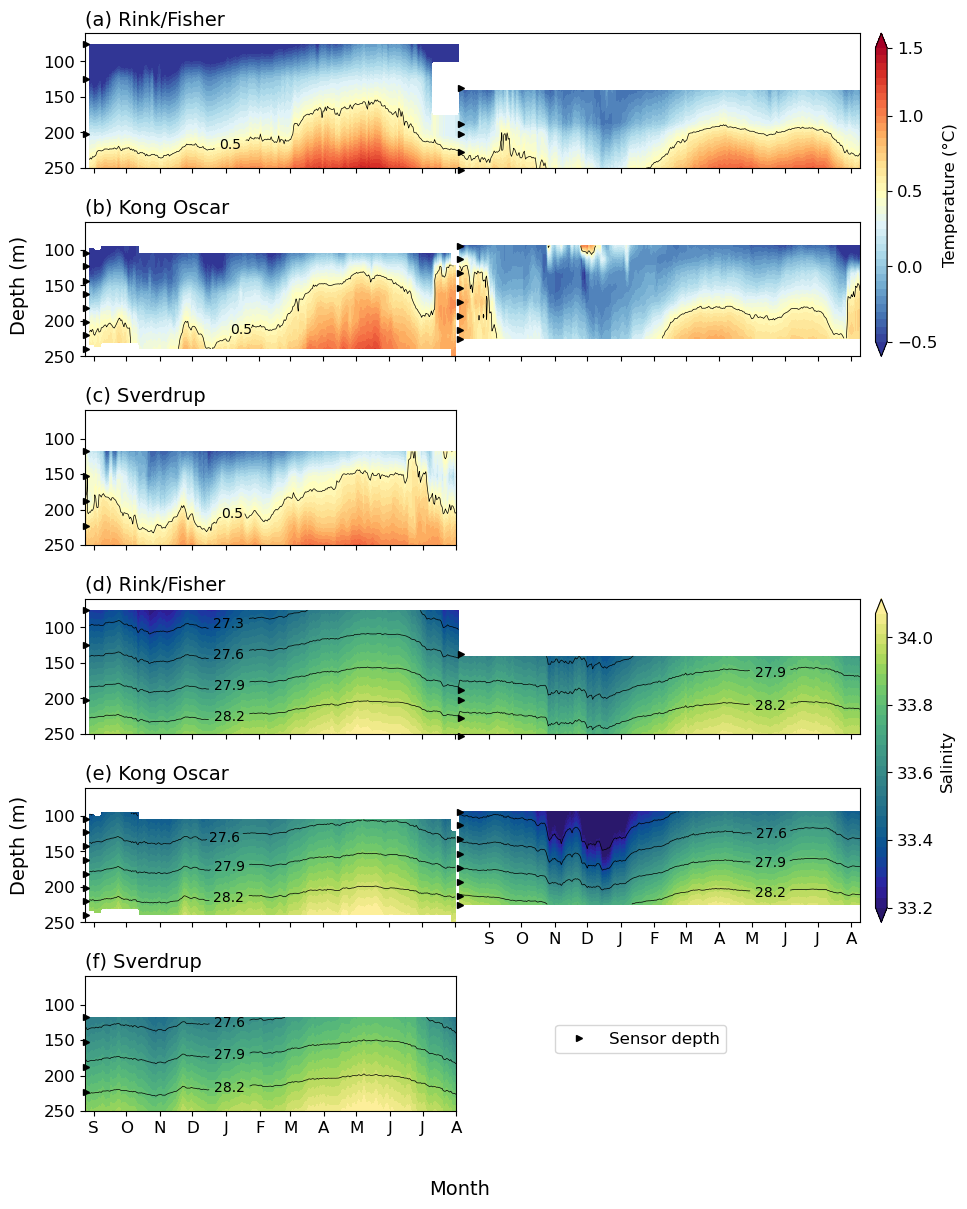

In [12]:
#### create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=6,
                         width_ratios=[1, 1.07], wspace=0.017)

fig = plt.figure(figsize=(10, 14))
ax1 = fig.add_subplot(6,2,(1,2)) # three rows, two colums, combined first and second cell
ax2 = fig.add_subplot(6,2,(3,4)) # three rows, two colums, combined third and fourth cell
ax3 = fig.add_subplot(spec[4])

ax4 = fig.add_subplot(6,2,(7,8))
ax5 = fig.add_subplot(6,2,(9,10))
ax6 = fig.add_subplot(spec[10])

plt.subplots_adjust(hspace=0.4)

plt.rcParams['font.size'] = '12'

# for all the same temp/salinity scales between all mooring plots:
levels_temp=np.arange(-0.5,1.5,0.05)

rink_fisher_temp_interp_ds.temperature.plot.contourf(ax=ax1,cmap='RdYlBu_r',levels=levels_temp,add_colorbar=False)
cs1 = rink_fisher_temp_interp_ds.temperature.plot.contour(ax=ax1,colors='k',levels=[0.5],linewidths=0.5,add_colorbar=False)
cbar = KO_temp_interp_ds.temperature.plot.contourf(ax=ax2,cmap='RdYlBu_r',levels=levels_temp,add_colorbar=False, extend='both')
cs2 = KO_temp_interp_ds.temperature.plot.contour(ax=ax2,colors='k',levels=[0.5],linewidths=0.5,add_colorbar=False)
sverdrup_temp_interp_ds.temperature.plot.contourf(ax=ax3,cmap='RdYlBu_r',levels=levels_temp,add_colorbar=False)
cs3 = sverdrup_temp_interp_ds.temperature.plot.contour(ax=ax3,colors='k',levels=[0.5],linewidths=0.5,add_colorbar=False)

# add isotherm label
cl = ax1.clabel(cs1, fontsize=10, fmt='%.1f',manual=[(17900,200)])
for l in cl:l.set_rotation(0)
cl = ax2.clabel(cs2, fontsize=10, fmt='%.1f',manual=[(17900,200)])
for l in cl:l.set_rotation(0)
cl = ax3.clabel(cs3, fontsize=10, fmt='%.1f',manual=[(17900,200)])
for l in cl:l.set_rotation(0)

# set axis limits
# ax1.set_ylim(rink_fisher_temp_interp_ds.depth.max(),rink_fisher_temp_interp_ds.depth.min()-50)
# ax2.set_ylim(KO_temp_interp_ds.depth.max(),KO_temp_interp_ds.depth.min()-50)
# ax3.set_ylim(sverdrup_temp_interp_ds.depth.max(),sverdrup_temp_interp_ds.depth.min()-50)

ax1.set_xlim(sverdrup_temp_interp_ds.isel(time=0).time,KO_temp_interp_ds.time.isel(time=len(KO_temp_interp_ds.time.values)-1))
ax2.set_xlim(sverdrup_temp_interp_ds.isel(time=0).time,KO_temp_interp_ds.time.isel(time=len(KO_temp_interp_ds.time.values)-1))
ax3.set_xlim(sverdrup_temp_interp_ds.isel(time=0).time,np.datetime64('2019-08-01'))

# subplot labels -----------------------------------------------------------------------
ax1.set_title("(a) Rink/Fisher",loc='left',fontsize = 14)
ax2.set_title("(b) Kong Oscar",loc='left',fontsize = 14)
ax3.set_title("(c) Sverdrup",loc='left',fontsize = 14)

# remove y-axis tick labels for subplot 2
# ax2.yaxis.set_ticklabels([])

# settings for ticks and tick labels ----------------------------------------------------
# remove the x and y ticks
for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(250,60)
    
months18 = pd.period_range(np.datetime64('2018-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
months19 = pd.period_range(np.datetime64('2019-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
months   = pd.period_range(np.datetime64('2018-09'), freq='M', periods=24).strftime('%Y-%m').tolist()
# abbrev = ["S","O",'N','D',"J",'F','M','A','M','J','J','A']
# abbrev_long = ["","","","","","","","","","","","","S","O",'N','D',"J",'F','M','A','M','J','J','A']
ax1.set_xticks(months, [])
ax2.set_xticks(months, [], rotation=0, horizontalalignment = 'center')
ax3.set_xticks(months18, [], rotation=0, horizontalalignment = 'center')
# axs[3].tick_params(labelbottom=True)

## add colorbar -----------------------------------------------------------------------
axins = inset_axes(
    ax2,
    width="1.5%",  # width: 5% of parent_bbox width
    height="240%",
    loc="upper left",
    bbox_to_anchor=(1.02, 1.4, 1, 1), # change these values to adjust position of colorbar
    bbox_transform=ax2.transAxes,
    borderpad=0)

fig.colorbar(cbar, cax=axins, label='Temperature (°C)', ticks=[-0.5, 0, 0.5, 1, 1.5], orientation='vertical')

## add sensor depths ------------------------------------------------------------------
ax1.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(rink_ds.Depth_temp[0:3]))), rink_ds.Depth_temp.values[0:3],">", color='black', markersize=4, clip_on=False)
ax1.plot(list(itertools.repeat(fisher_ds.time[1].values, len(fisher_ds.Depth_temp[0:5]))), fisher_ds.Depth_temp.values[0:5]+1,">", color='black', markersize=4, clip_on=False)
ax2.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(kongoscar19.Depth_temp))), kongoscar19.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax2.plot(list(itertools.repeat(kongoscar20.time[1].values, len(kongoscar20.Depth_temp))), kongoscar20.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax3.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(sverdrup_ds.Depth_temp[0:4]))), sverdrup_ds.Depth_temp.values[0:4],">", color='black', markersize=4, clip_on=False,\
            label='Sensor depth');

#### SALINITY SUBPLOTS #### =============

# for all the same temp/salinity scales between all mooring plots:
levels_salt=np.arange(33.2,34.1,0.03)
levels_dens=[27.3,27.6,27.9,28.2]

manual_locations = [(17900,220),(17900,170),(17900,140),(17900,100),(18400,170),(18400,240)]
rink_fisher_salt_interp_ds.salinity.plot.contourf(ax=ax4,cmap=cmocean.cm.haline,levels=levels_salt,add_colorbar=False)
cs = rink_fisher_dens_interp_ds.density.plot.contour(ax=ax4,levels=levels_dens,colors='k',linewidths=0.5)
cl = ax4.clabel(cs, fontsize=10, fmt='%.1f',manual=manual_locations)
for l in cl:l.set_rotation(0)

manual_locations = [(17900,220),(17900,170),(17900,140),(18400,120),(18400,170),(18400,240)]
cbar = KO_salt_interp_ds.salinity.plot.contourf(ax=ax5,  cmap=cmocean.cm.haline,levels=levels_salt,add_colorbar=False, extend='both')
cs = KO_dens_interp_ds.density.plot.contour(ax=ax5,levels=levels_dens,colors='k',linewidths=0.5)
cl = ax5.clabel(cs, fontsize=10, fmt='%.1f',manual=manual_locations)
for l in cl:l.set_rotation(0)

manual_locations = [(17900,220),(17900,170),(17900,140)]
sverdrup_salt_interp_ds.salinity.plot.contourf(ax=ax6,   cmap=cmocean.cm.haline,levels=levels_salt,add_colorbar=False)
cs = sverdrup_dens_interp_ds.density.plot.contour(ax=ax6,levels=levels_dens,colors='k',linewidths=0.5)
cl = ax6.clabel(cs, fontsize=10, fmt='%.1f',manual=manual_locations)
for l in cl:l.set_rotation(0)

ax4.set_xlim(sverdrup_salt_interp_ds.isel(time=0).time,KO_salt_interp_ds.time.isel(time=len(KO_salt_interp_ds.time.values)-1))
ax5.set_xlim(sverdrup_salt_interp_ds.isel(time=0).time,KO_salt_interp_ds.time.isel(time=len(KO_salt_interp_ds.time.values)-1))
ax6.set_xlim(sverdrup_salt_interp_ds.isel(time=0).time,np.datetime64('2019-08-01'))

# subplot labels -----------------------------------------------------------------------
ax4.set_title("(d) Rink/Fisher",loc='left',fontsize = 14)
ax5.set_title("(e) Kong Oscar",loc='left',fontsize = 14)
ax6.set_title("(f) Sverdrup",loc='left',fontsize = 14)

# settings for ticks and tick labels ----------------------------------------------------
# remove the x and y ticks
for ax in [ax4,ax5,ax6]:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(250,60)
    
months18 = pd.period_range(np.datetime64('2018-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
months19 = pd.period_range(np.datetime64('2019-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
months   = pd.period_range(np.datetime64('2018-09'), freq='M', periods=24).strftime('%Y-%m').tolist()
abbrev = ["S","O",'N','D',"J",'F','M','A','M','J','J','A']
abbrev_long = ["","","","","","","","","","","","","S","O",'N','D',"J",'F','M','A','M','J','J','A']
ax4.set_xticks(months, [])
ax5.set_xticks(months, abbrev_long, rotation=0, horizontalalignment = 'center')
ax6.set_xticks(months18, abbrev, rotation=0, horizontalalignment = 'center')
# axs[3].tick_params(labelbottom=True)

## add colorbar -----------------------------------------------------------------------
axins = inset_axes(
    ax5,
    width="1.5%",  # width: 5% of parent_bbox width
    height="240%",
    loc="upper left",
    bbox_to_anchor=(1.02, 1.4, 1, 1), # change these values to adjust position of colorbar
    bbox_transform=ax5.transAxes,
    borderpad=0)

fig.colorbar(cbar, cax=axins, label='Salinity', ticks=[33.2, 33.4, 33.6, 33.8, 34], orientation='vertical')

fig.text(0.5, 0.05, 'Month', size=14, ha='center')
fig.text(0.05, 0.3, 'Depth (m)', size=14, va='center', rotation='vertical');
fig.text(0.05, 0.7, 'Depth (m)', size=14, va='center', rotation='vertical');

## add sensor depths ------------------------------------------------------------------
ax4.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(rink_ds.Depth_temp[0:3]))), rink_ds.Depth_temp.values[0:3],">", color='black', markersize=4, clip_on=False)
ax4.plot(list(itertools.repeat(fisher_ds.time[1].values, len(fisher_ds.Depth_temp[0:5]))), fisher_ds.Depth_temp.values[0:5]+1,">", color='black', markersize=4, clip_on=False)
ax5.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(kongoscar19.Depth_temp))), kongoscar19.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax5.plot(list(itertools.repeat(kongoscar20.time[1].values, len(kongoscar20.Depth_temp))), kongoscar20.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax6.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(sverdrup_ds.Depth_temp[0:4]))), sverdrup_ds.Depth_temp.values[0:4],">", color='black', markersize=4, clip_on=False,\
            label='Sensor depth');
ax6.legend(bbox_to_anchor=(0.75, -0.3, 1, 1));

plt.savefig("figures/Mooring_profiles_60to250m.png", bbox_inches='tight', dpi=300)

### Anomalies - minus mean across depth

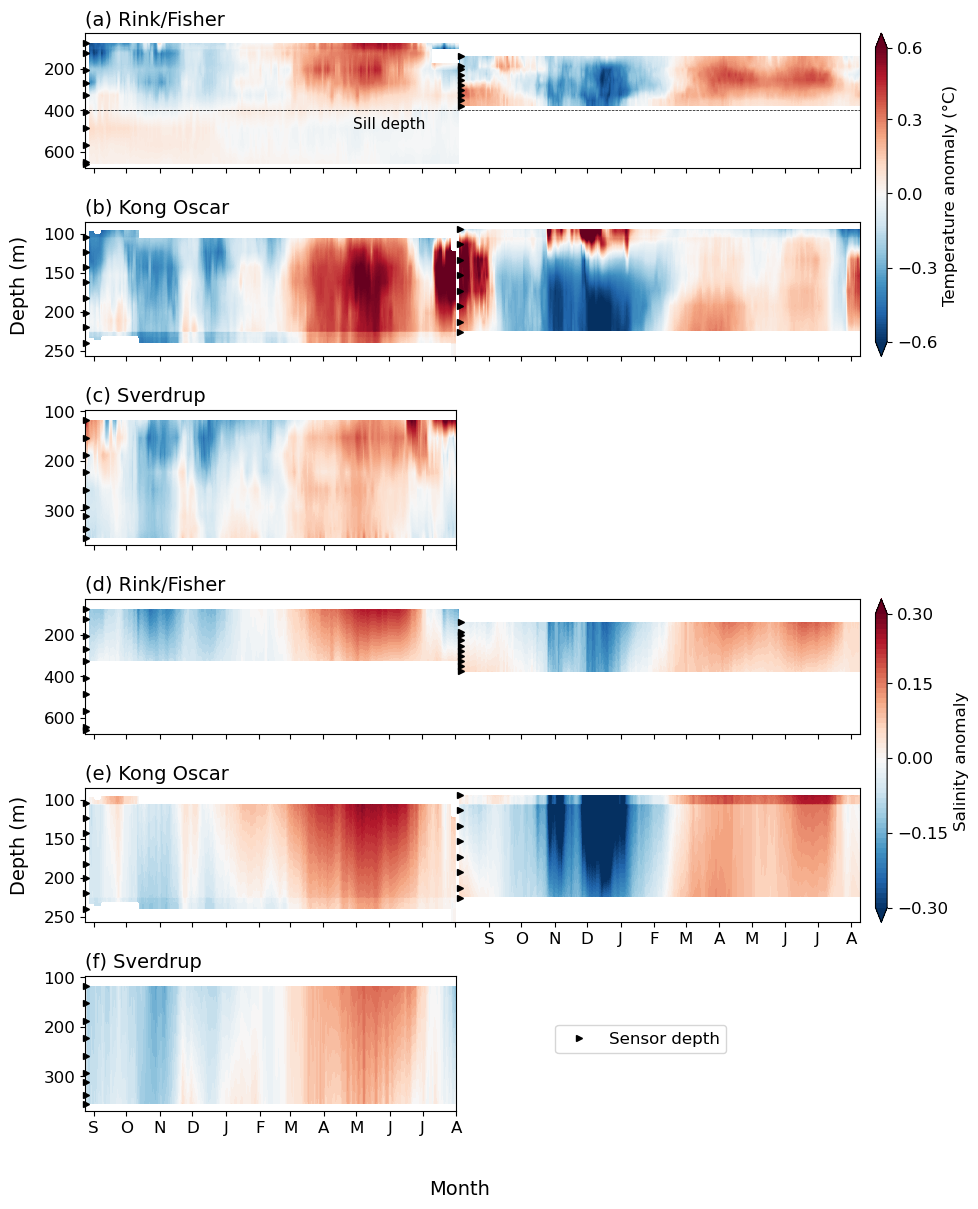

In [13]:
#### create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=6,
                         width_ratios=[1, 1.07], wspace=0.017)

fig = plt.figure(figsize=(10, 14))
ax1 = fig.add_subplot(6,2,(1,2)) # three rows, two colums, combined first and second cell
ax2 = fig.add_subplot(6,2,(3,4)) # three rows, two colums, combined third and fourth cell
ax3 = fig.add_subplot(spec[4])

ax4 = fig.add_subplot(6,2,(7,8))
ax5 = fig.add_subplot(6,2,(9,10))
ax6 = fig.add_subplot(spec[10])

plt.subplots_adjust(hspace=0.4)

plt.rcParams['font.size'] = '12'

# for all the same temp/salinity scales between all mooring plots:
levels_temp=np.arange(-0.6,0.6,0.01)

# plot rink timeseries
rink_temp_interp_ds = rink_fisher_temp_interp_ds.sel(time=slice("08-20-2018","08-6-2019"))
(rink_temp_interp_ds.temperature-rink_temp_interp_ds.temperature.mean(dim='time')).plot.contourf(ax=ax1,cmap='RdBu_r',levels=levels_temp,add_colorbar=False)
# plot fisher timeseries
fisher_temp_interp_ds = rink_fisher_temp_interp_ds.sel(time=slice("08-6-2019","08-12-2020"))
(fisher_temp_interp_ds.temperature-fisher_temp_interp_ds.temperature.mean(dim='time')).plot.contourf(ax=ax1,cmap='RdBu_r',levels=levels_temp,add_colorbar=False)
# plot KO
cbar = (KO_temp_interp_ds.temperature-KO_temp_interp_ds.temperature.mean(dim='time')).plot.contourf(ax=ax2,cmap='RdBu_r',levels=levels_temp,add_colorbar=False, extend='both')
# plot sverdrup
(sverdrup_temp_interp_ds.temperature-sverdrup_temp_interp_ds.temperature.mean(dim='time')).plot.contourf(ax=ax3,cmap='RdBu_r',levels=levels_temp,add_colorbar=False)

ax1.set_xlim(sverdrup_temp_interp_ds.isel(time=0).time,KO_temp_interp_ds.time.isel(time=len(KO_temp_interp_ds.time.values)-1))
ax2.set_xlim(sverdrup_temp_interp_ds.isel(time=0).time,KO_temp_interp_ds.time.isel(time=len(KO_temp_interp_ds.time.values)-1))
ax3.set_xlim(sverdrup_temp_interp_ds.isel(time=0).time,np.datetime64('2019-08-01'))

# subplot labels -----------------------------------------------------------------------
ax1.set_title("(a) Rink/Fisher",loc='left',fontsize = 14)
ax2.set_title("(b) Kong Oscar",loc='left',fontsize = 14)
ax3.set_title("(c) Sverdrup",loc='left',fontsize = 14)

# remove y-axis tick labels for subplot 2
# ax2.yaxis.set_ticklabels([])

# settings for ticks and tick labels ----------------------------------------------------
# remove the x and y ticks
for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('')
    ax.set_ylabel('')
    # ax.invert_yaxis()
    
months18 = pd.period_range(np.datetime64('2018-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
months19 = pd.period_range(np.datetime64('2019-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
months   = pd.period_range(np.datetime64('2018-09'), freq='M', periods=24).strftime('%Y-%m').tolist()
# abbrev = ["S","O",'N','D',"J",'F','M','A','M','J','J','A']
# abbrev_long = ["","","","","","","","","","","","","S","O",'N','D',"J",'F','M','A','M','J','J','A']
ax1.set_xticks(months, [])
ax2.set_xticks(months, [], rotation=0, horizontalalignment = 'center')
ax3.set_xticks(months18, [], rotation=0, horizontalalignment = 'center')
# axs[3].tick_params(labelbottom=True)

## add colorbar -----------------------------------------------------------------------
axins = inset_axes(
    ax2,
    width="1.5%",  # width: 5% of parent_bbox width
    height="240%",
    loc="upper left",
    bbox_to_anchor=(1.02, 1.4, 1, 1), # change these values to adjust position of colorbar
    bbox_transform=ax2.transAxes,
    borderpad=0)

fig.colorbar(cbar, cax=axins, label='Temperature anomaly (°C)', ticks=[-0.6, -0.3, 0, 0.3, 0.6], orientation='vertical')

## add sensor depths ------------------------------------------------------------------
ax1.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(rink_ds.Depth_temp))), rink_ds.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax1.plot(list(itertools.repeat(fisher_ds.time[1].values, len(fisher_ds.Depth_temp))), fisher_ds.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax2.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(kongoscar19.Depth_temp))), kongoscar19.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax2.plot(list(itertools.repeat(kongoscar20.time[1].values, len(kongoscar20.Depth_temp))), kongoscar20.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax3.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(sverdrup_ds.Depth_temp))), sverdrup_ds.Depth_temp.values,">", color='black', markersize=4, clip_on=False,\
            label='Sensor depth');

#### SALINITY SUBPLOTS #### =============

# for all the same temp/salinity scales between all mooring plots:
levels_salt=np.arange(-0.3,0.3,0.01)

# plot rink timeseries
rink_salt_interp_ds = rink_fisher_salt_interp_ds.sel(time=slice("08-20-2018","08-6-2019"))
(rink_salt_interp_ds.salinity-rink_salt_interp_ds.salinity.mean(dim='time')).plot.contourf(ax=ax4,cmap='RdBu_r',levels=levels_salt,add_colorbar=False)
# plot fisher timeseries
fisher_salt_interp_ds = rink_fisher_salt_interp_ds.sel(time=slice("08-6-2019","08-12-2020"))
(fisher_salt_interp_ds.salinity-fisher_salt_interp_ds.salinity.mean(dim='time')).plot.contourf(ax=ax4,cmap='RdBu_r',levels=levels_salt,add_colorbar=False)
# plot KO
cbar = (KO_salt_interp_ds.salinity-KO_salt_interp_ds.salinity.mean(dim='time')).plot.contourf(ax=ax5,cmap='RdBu_r',levels=levels_salt,add_colorbar=False, extend='both')
# plot sverdrup
(sverdrup_salt_interp_ds.salinity-sverdrup_salt_interp_ds.salinity.mean(dim='time')).plot.contourf(ax=ax6,cmap='RdBu_r',levels=levels_salt,add_colorbar=False)

ax4.set_xlim(sverdrup_salt_interp_ds.isel(time=0).time,KO_salt_interp_ds.time.isel(time=len(KO_salt_interp_ds.time.values)-1))
ax5.set_xlim(sverdrup_salt_interp_ds.isel(time=0).time,KO_salt_interp_ds.time.isel(time=len(KO_salt_interp_ds.time.values)-1))
ax6.set_xlim(sverdrup_salt_interp_ds.isel(time=0).time,np.datetime64('2019-08-01'))

# subplot labels -----------------------------------------------------------------------
ax4.set_title("(d) Rink/Fisher",loc='left',fontsize = 14)
ax5.set_title("(e) Kong Oscar",loc='left',fontsize = 14)
ax6.set_title("(f) Sverdrup",loc='left',fontsize = 14)

# settings for ticks and tick labels ----------------------------------------------------
# remove the x and y ticks
for ax in [ax4,ax5,ax6]:
    ax.set_xlabel('')
    ax.set_ylabel('')
    
months18 = pd.period_range(np.datetime64('2018-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
months19 = pd.period_range(np.datetime64('2019-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
months   = pd.period_range(np.datetime64('2018-09'), freq='M', periods=24).strftime('%Y-%m').tolist()
abbrev = ["S","O",'N','D',"J",'F','M','A','M','J','J','A']
abbrev_long = ["","","","","","","","","","","","","S","O",'N','D',"J",'F','M','A','M','J','J','A']
ax4.set_xticks(months, [])
ax5.set_xticks(months, abbrev_long, rotation=0, horizontalalignment = 'center')
ax6.set_xticks(months18, abbrev, rotation=0, horizontalalignment = 'center')
# axs[3].tick_params(labelbottom=True)

## add colorbar -----------------------------------------------------------------------
axins = inset_axes(
    ax5,
    width="1.5%",  # width: 5% of parent_bbox width
    height="240%",
    loc="upper left",
    bbox_to_anchor=(1.02, 1.4, 1, 1), # change these values to adjust position of colorbar
    bbox_transform=ax5.transAxes,
    borderpad=0)

fig.colorbar(cbar, cax=axins, label='Salinity anomaly', ticks=[-0.3, -0.15, 0, 0.15, 0.3], orientation='vertical')

fig.text(0.5, 0.05, 'Month', size=14, ha='center')
fig.text(0.05, 0.3, 'Depth (m)', size=14, va='center', rotation='vertical');
fig.text(0.05, 0.7, 'Depth (m)', size=14, va='center', rotation='vertical');

## add sensor depths ------------------------------------------------------------------
ax4.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(rink_ds.Depth_temp))), rink_ds.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax4.plot(list(itertools.repeat(fisher_ds.time[1].values, len(fisher_ds.Depth_temp))), fisher_ds.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax5.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(kongoscar19.Depth_temp))), kongoscar19.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax5.plot(list(itertools.repeat(kongoscar20.time[1].values, len(kongoscar20.Depth_temp))), kongoscar20.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax6.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(sverdrup_ds.Depth_temp))), sverdrup_ds.Depth_temp.values,">", color='black', markersize=4, clip_on=False,\
            label='Sensor depth');
ax6.legend(bbox_to_anchor=(0.75, -0.3, 1, 1));

# set axis limits
ax1.set_ylim(rink_fisher_temp_interp_ds.depth.max()+20,rink_fisher_temp_interp_ds.depth.min()-50)
ax2.set_ylim(KO_temp_interp_ds.depth.max(),KO_temp_interp_ds.depth.min()-10)
ax3.set_ylim(sverdrup_temp_interp_ds.depth.max()+15,sverdrup_temp_interp_ds.depth.min()-20)
ax4.set_ylim(rink_fisher_temp_interp_ds.depth.max()+20,rink_fisher_temp_interp_ds.depth.min()-50)
ax5.set_ylim(KO_temp_interp_ds.depth.max(),KO_temp_interp_ds.depth.min()-10)
ax6.set_ylim(sverdrup_temp_interp_ds.depth.max()+15,sverdrup_temp_interp_ds.depth.min()-20);

# add dashed line for frist axis at 400 m
ax1.axhline(y=400, color='k', linestyle='--', linewidth=0.5)
# add label
ax1.text(rink_temp_interp_ds.isel(time=-100).time.values, 490, 'Sill depth', size=11)

# plt.savefig("figures/Mooring_profiles_depth-anomaly_60to250m.png", bbox_inches='tight', dpi=300)

### Anomalies - minus mean over depth and time

In [57]:
temp_60to250 = np.concatenate((rink_fisher_temp_interp_ds.temperature.sel(depth=slice(60,250)).values.ravel(),\
                               KO_temp_interp_ds.temperature.sel(depth=slice(60,250)).values.ravel(),\
                               sverdrup_temp_interp_ds.temperature.sel(depth=slice(60,250)).values.ravel()))

In [58]:
temp_mean_60to250 = np.nanmean(temp_60to250)

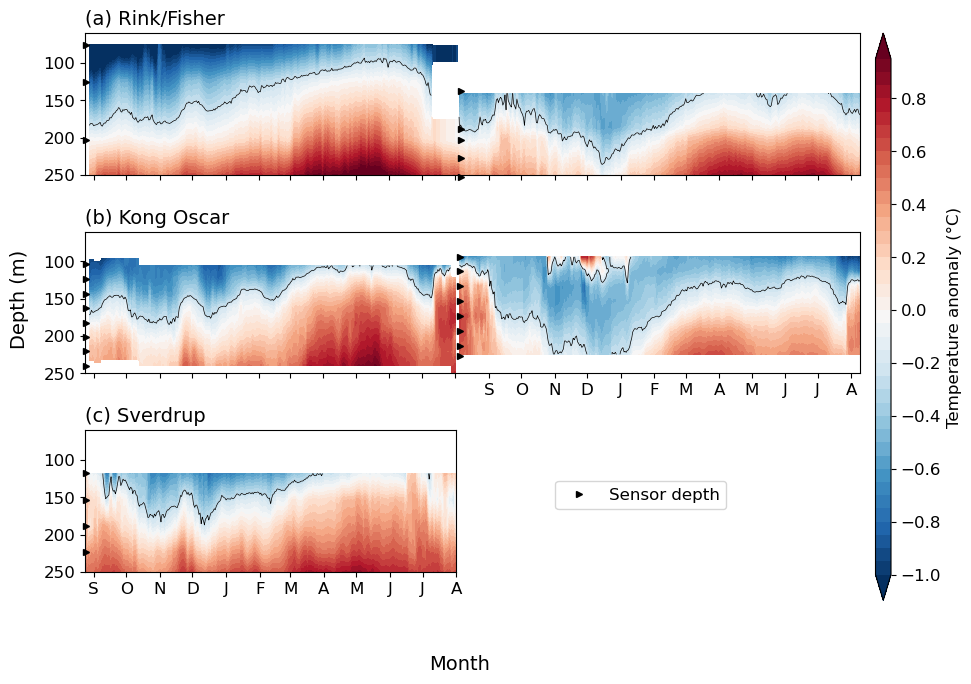

In [60]:
#### create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=3,
                         width_ratios=[1, 1.07], wspace=0.017)

fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(3,2,(1,2)) # three rows, two colums, combined first and second cell
ax2 = fig.add_subplot(3,2,(3,4)) # three rows, two colums, combined third and fourth cell
ax3 = fig.add_subplot(spec[4])

plt.subplots_adjust(hspace=0.4)

plt.rcParams['font.size'] = '12'

# for all the same temp/salinity scales between all mooring plots:
levels_temp=np.arange(-1,1,0.05)

(rink_fisher_temp_interp_ds.temperature-temp_mean_60to250).plot.contourf(ax=ax1,cmap='RdBu_r',levels=levels_temp,add_colorbar=False)
rink_fisher_temp_interp_ds.temperature.plot.contour(ax=ax1,colors='k',levels=[0],linewidths=0.5,add_colorbar=False)
cbar = (KO_temp_interp_ds.temperature-temp_mean_60to250).plot.contourf(ax=ax2,cmap='RdBu_r',levels=levels_temp,add_colorbar=False, extend='both')
KO_temp_interp_ds.temperature.plot.contour(ax=ax2,colors='k',levels=[0],linewidths=0.5,add_colorbar=False)
(sverdrup_temp_interp_ds.temperature-temp_mean_60to250).plot.contourf(ax=ax3,cmap='RdBu_r',levels=levels_temp,add_colorbar=False)
sverdrup_temp_interp_ds.temperature.plot.contour(ax=ax3,colors='k',levels=[0],linewidths=0.5,add_colorbar=False)

# set axis limits
# ax1.set_ylim(rink_fisher_temp_interp_ds.depth.max(),rink_fisher_temp_interp_ds.depth.min()-50)
# ax2.set_ylim(KO_temp_interp_ds.depth.max(),KO_temp_interp_ds.depth.min()-50)
# ax3.set_ylim(sverdrup_temp_interp_ds.depth.max(),sverdrup_temp_interp_ds.depth.min()-50)

ax1.set_xlim(sverdrup_temp_interp_ds.isel(time=0).time,KO_temp_interp_ds.time.isel(time=len(KO_temp_interp_ds.time.values)-1))
ax2.set_xlim(sverdrup_temp_interp_ds.isel(time=0).time,KO_temp_interp_ds.time.isel(time=len(KO_temp_interp_ds.time.values)-1))
ax3.set_xlim(sverdrup_temp_interp_ds.isel(time=0).time,np.datetime64('2019-08-01'))

# subplot labels -----------------------------------------------------------------------
ax1.set_title("(a) Rink/Fisher",loc='left',fontsize = 14)
ax2.set_title("(b) Kong Oscar",loc='left',fontsize = 14)
ax3.set_title("(c) Sverdrup",loc='left',fontsize = 14)

# remove y-axis tick labels for subplot 2
# ax2.yaxis.set_ticklabels([])

# settings for ticks and tick labels ----------------------------------------------------
# remove the x and y ticks
for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(250,60)
    
months18 = pd.period_range(np.datetime64('2018-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
months19 = pd.period_range(np.datetime64('2019-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
months   = pd.period_range(np.datetime64('2018-09'), freq='M', periods=24).strftime('%Y-%m').tolist()
abbrev = ["S","O",'N','D',"J",'F','M','A','M','J','J','A']
abbrev_long = ["","","","","","","","","","","","","S","O",'N','D',"J",'F','M','A','M','J','J','A']
ax1.set_xticks(months, [])
ax2.set_xticks(months, abbrev_long, rotation=0, horizontalalignment = 'center')
ax3.set_xticks(months18, abbrev, rotation=0, horizontalalignment = 'center')
# axs[3].tick_params(labelbottom=True)

## add colorbar -----------------------------------------------------------------------
axins = inset_axes(
    ax2,
    width="2%",  # width: 5% of parent_bbox width
    height="400%",
    loc="upper left",
    bbox_to_anchor=(1.02, 1.4, 1, 1), # change these values to adjust position of colorbar
    bbox_transform=ax2.transAxes,
    borderpad=0)

fig.colorbar(cbar, cax=axins, label='Temperature anomaly (°C)', orientation='vertical')

fig.text(0.5, -0.03, 'Month', size=14, ha='center')
fig.text(0.05, 0.5, 'Depth (m)', size=14, va='center', rotation='vertical');

## add sensor depths ------------------------------------------------------------------
ax1.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(rink_ds.Depth_temp[0:3]))), rink_ds.Depth_temp.values[0:3],">", color='black', markersize=4, clip_on=False)
ax1.plot(list(itertools.repeat(fisher_ds.time[1].values, len(fisher_ds.Depth_temp[0:5]))), fisher_ds.Depth_temp.values[0:5]+1,">", color='black', markersize=4, clip_on=False)
ax2.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(kongoscar19.Depth_temp))), kongoscar19.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax2.plot(list(itertools.repeat(kongoscar20.time[1].values, len(kongoscar20.Depth_temp))), kongoscar20.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax3.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(sverdrup_ds.Depth_temp[0:4]))), sverdrup_ds.Depth_temp.values[0:4],">", color='black', markersize=4, clip_on=False,\
            label='Sensor depth');

ax3.legend(bbox_to_anchor=(0.75, -0.3, 1, 1));
plt.savefig("figures/Mooring_profiles_temperature_60to250m_anomaly.png", bbox_inches='tight', dpi=300)

In [54]:
salt_60to250 = np.concatenate((rink_fisher_salt_interp_ds.salinity.sel(depth=slice(60,250)).values.ravel(),\
                               KO_salt_interp_ds.salinity.sel(depth=slice(60,250)).values.ravel(),\
                               sverdrup_salt_interp_ds.salinity.sel(depth=slice(60,250)).values.ravel()))

In [55]:
salt_mean_60to250 = np.nanmean(salt_60to250)

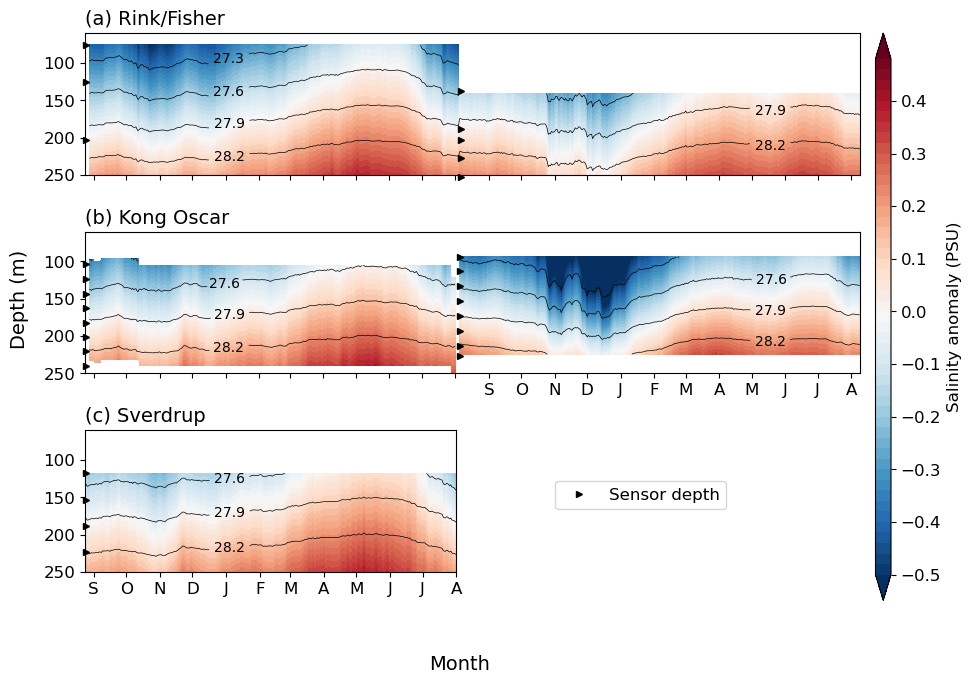

In [61]:
#### create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=3,
                         width_ratios=[1, 1.07], wspace=0.017)

fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(3,2,(1,2)) # three rows, two colums, combined first and second cell
ax2 = fig.add_subplot(3,2,(3,4)) # three rows, two colums, combined third and fourth cell
ax3 = fig.add_subplot(spec[4])

plt.subplots_adjust(hspace=0.4)

plt.rcParams['font.size'] = '12'

# for all the same temp/salinity scales between all mooring plots:
levels_salt=np.arange(-0.5,0.5,0.02)
levels_dens=[27.3,27.6,27.9,28.2]

manual_locations = [(17900,220),(17900,170),(17900,140),(17900,100),(18400,170),(18400,240)]
(rink_fisher_salt_interp_ds.salinity-salt_mean_60to250).plot.contourf(ax=ax1,cmap='RdBu_r',levels=levels_salt,add_colorbar=False)
cs = rink_fisher_dens_interp_ds.density.plot.contour(ax=ax1,levels=levels_dens,colors='k',linewidths=0.5)
cl = ax1.clabel(cs, fontsize=10, fmt='%.1f',manual=manual_locations)
for l in cl:l.set_rotation(0)

manual_locations = [(17900,220),(17900,170),(17900,140),(18400,120),(18400,170),(18400,240)]
cbar = (KO_salt_interp_ds.salinity-salt_mean_60to250).plot.contourf(ax=ax2,cmap='RdBu_r',levels=levels_salt,add_colorbar=False, extend='both')
cs = KO_dens_interp_ds.density.plot.contour(ax=ax2,levels=levels_dens,colors='k',linewidths=0.5)
cl = ax2.clabel(cs, fontsize=10, fmt='%.1f',manual=manual_locations)
for l in cl:l.set_rotation(0)

manual_locations = [(17900,220),(17900,170),(17900,140)]
(sverdrup_salt_interp_ds.salinity-salt_mean_60to250).plot.contourf(ax=ax3,cmap='RdBu_r',levels=levels_salt,add_colorbar=False)
cs = sverdrup_dens_interp_ds.density.plot.contour(ax=ax3,levels=levels_dens,colors='k',linewidths=0.5)
cl = ax3.clabel(cs, fontsize=10, fmt='%.1f',manual=manual_locations)
for l in cl:l.set_rotation(0)

ax1.set_xlim(sverdrup_salt_interp_ds.isel(time=0).time,KO_salt_interp_ds.time.isel(time=len(KO_salt_interp_ds.time.values)-1))
ax2.set_xlim(sverdrup_salt_interp_ds.isel(time=0).time,KO_salt_interp_ds.time.isel(time=len(KO_salt_interp_ds.time.values)-1))
ax3.set_xlim(sverdrup_salt_interp_ds.isel(time=0).time,np.datetime64('2019-08-01'))

# subplot labels -----------------------------------------------------------------------
ax1.set_title("(a) Rink/Fisher",loc='left',fontsize = 14)
ax2.set_title("(b) Kong Oscar",loc='left',fontsize = 14)
ax3.set_title("(c) Sverdrup",loc='left',fontsize = 14)

# settings for ticks and tick labels ----------------------------------------------------
# remove the x and y ticks
for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(250,60)
    
months18 = pd.period_range(np.datetime64('2018-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
months19 = pd.period_range(np.datetime64('2019-09'), freq='M', periods=12).strftime('%Y-%m').tolist()
months   = pd.period_range(np.datetime64('2018-09'), freq='M', periods=24).strftime('%Y-%m').tolist()
abbrev = ["S","O",'N','D',"J",'F','M','A','M','J','J','A']
abbrev_long = ["","","","","","","","","","","","","S","O",'N','D',"J",'F','M','A','M','J','J','A']
ax1.set_xticks(months, [])
ax2.set_xticks(months, abbrev_long, rotation=0, horizontalalignment = 'center')
ax3.set_xticks(months18, abbrev, rotation=0, horizontalalignment = 'center')
# axs[3].tick_params(labelbottom=True)

## add colorbar -----------------------------------------------------------------------
axins = inset_axes(
    ax2,
    width="2%",  # width: 5% of parent_bbox width
    height="400%",
    loc="upper left",
    bbox_to_anchor=(1.02, 1.4, 1, 1), # change these values to adjust position of colorbar
    bbox_transform=ax2.transAxes,
    borderpad=0)

fig.colorbar(cbar, cax=axins, label='Salinity anomaly', orientation='vertical')

fig.text(0.5, -0.03, 'Month', size=14, ha='center')
fig.text(0.05, 0.5, 'Depth (m)', size=14, va='center', rotation='vertical');

## add sensor depths ------------------------------------------------------------------
ax1.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(rink_ds.Depth_temp[0:3]))), rink_ds.Depth_temp.values[0:3],">", color='black', markersize=4, clip_on=False)
ax1.plot(list(itertools.repeat(fisher_ds.time[1].values, len(fisher_ds.Depth_temp[0:5]))), fisher_ds.Depth_temp.values[0:5]+1,">", color='black', markersize=4, clip_on=False)
ax2.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(kongoscar19.Depth_temp))), kongoscar19.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax2.plot(list(itertools.repeat(kongoscar20.time[1].values, len(kongoscar20.Depth_temp))), kongoscar20.Depth_temp.values,">", color='black', markersize=4, clip_on=False)
ax3.plot(list(itertools.repeat(sverdrup_ds.time[1].values, len(sverdrup_ds.Depth_temp[0:4]))), sverdrup_ds.Depth_temp.values[0:4],">", color='black', markersize=4, clip_on=False,\
            label='Sensor depth');
ax3.legend(bbox_to_anchor=(0.75, -0.3, 1, 1));

plt.savefig("figures/Mooring_profiles_salinity_60to250m_anomaly.png", bbox_inches='tight', dpi=300)